<a href="https://colab.research.google.com/github/enzomolloy/TpFinal-Redes-Neuronales-/blob/main/MNIST_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema a resolver

El problema que decidimos resolver es el de identificación de un número de la La base de datos MNIST. Lo que hicimos fue crear una red neuronal implementada en Keras utilizando Tensorflow, para poder generar una predicción de que número puede llegar a ser el de la foto, de un lado estara la predicción y del otro el número de verdad.

#Importamos

In [15]:
!pip3 install keras-visualizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras_visualizer import visualizer 
from keras.utils.vis_utils import plot_model
from keras import models, layers  
from IPython.display import display, Image

np.random.seed(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Dataset

Usamos el dataset que ya se puede descargar desde google colab

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Vemos la cantidad de data que tenemos

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualizar ejemplos de entrada

Seteamos el tamaño que queremos de las imagenes, despues con el bucle for mostramos todos los casos (del 0 al 9) y lo hacemos lindo con el cmap tipo "gray" y su nombre arriba ""Label: {}".format(i), fontsize=16".

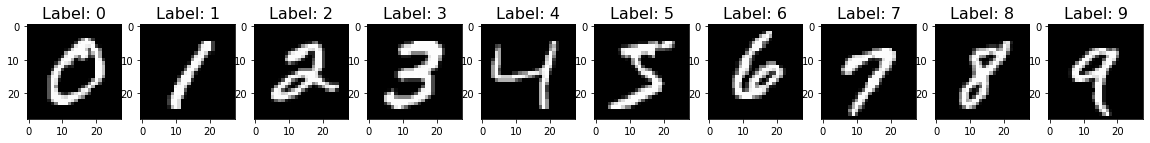

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

Aca lo que hacemos es, con el fin de obtener algun resultado que solo incluya el 0,1,2,3,4,5,6,7,8,9, lo clasificamos para esos valores, (por ejemplo para no obtener un 2,5 de resultado). Para hacerlo, creamos un vector para cada numero, el cual va del 0 hasta el 9, y en cada caso llenamos los valores de 0, excepto por el que realmente es, el cual le ponemos un 1. Por ejemplo en el primer caso el numero es el cinco, ya que las primeras casillas del 0 al 4 y las que les seguien del 6 al 9, se llenan con un 0 y la del cinco con un 1.

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Lo visualizamos para checkear:

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Data

Esto está normalizando los datos de x_train y x_test que van hasta 255.0, el cual es el valor máximo de un pixel en una imagen (RGB=255,255,255). Lo que hace es agarrar este valor maximo y dividirlo por x_train y x_test, con el fin de solo obtener valores entre 0 y 1. 

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

En esta parte usamos reshape, la cual es una función que sirve para cambiar la forma de una matriz, a un vector. En este caso lo que hace es cambiar la forma de x_train de (60000,28,28) a (60000,784) "784=28x28", es decir, de una matriz de 3 dimensiones a una matriz de 2 dimensiones, lo mismo hace con x_test.

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Creación del modelo

Aca lo que armamos es un modelo de red neuronal fully connected de 3 capas. La primera capa tiene 128 neuronas, la segunda capa tiene 128 neuronas y la última capa tiene 10 neuronas que corresponden a las 10 clases (del 0 al 9).

La primer capa es la que recibe la entrada de los 784 pixeles (el vector de 28x28 que hicimos arriba). La segunda es la capa que esta oculta, y se encarga de "aprender" las carateristicas de los datos para luego pasarla a la ultima capa. La tercera y última capa es la de salida. 

La función de activación de la primera y segunda capa es la función de activación ReLU, esta transforma los valores introducidos anulando los valores negativos, al igularlos a 0 y dejando los positivos tal y como entran. Por otro lado, la función softmax produce una salida de probabilidad para cada una de las 10 unidades de la última capa.

Ademas, usamos dropout, en este caso un 20% de nuestras neuronas, lo que hacemos es desactivarlas de forma random por este momento, con el fin de evitar el "overfitting". Esto es importante porque con este dropout buscamos excluir una gran cantidad de variables, e incluso variables irrelevantes, que pueden llegar a confundir nuestro modelo, al solo tener en cuenta los datos subidos. 

Finalmente: El método compile() sirve para especificar la función de costo y el optimizador que se van a utilizar en el entrenamiento del modelo. En este caso, se está especificando que se va a utilizar la función de costo categorical crossentropy y el optimizador adam. También se especifica que se va a calcular la métrica de precisión (accuracy) durante el entrenamiento.

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Usamos el keras-visualizer para ver lo de arriba de una forma mas clara. En donde lo que esta pasando, es que la activación de algunas de las neuronas de arriba, que son las correspondinte a los pixeles de nuestra foto, activan a algunas especificas de abajo. Estas hacen lo mismo con las de abajo y lo mismo hasta llegar a las ultimas 10 que son las que nos darian la probabilidad de que sea tal número. Esta activación occure sabiendo que tan positivo es el llamado peso o weight, que en nuestro grafico representarian las lineas que mandan mensajes de una nuerona a las demas. En otras palabras la entrada de datos se representa como un vector de n números. Cada número en el vector se asigna a un peso. Estos pesos se utilizan para calcular una suma ponderada de las entradas. Finalmente, la suma ponderada se pasa a través de la función de activación, para producir la salida. (Aclaración, no se por que me aparece como función de activación relu en el output, cuando en realidad uso softmax).  

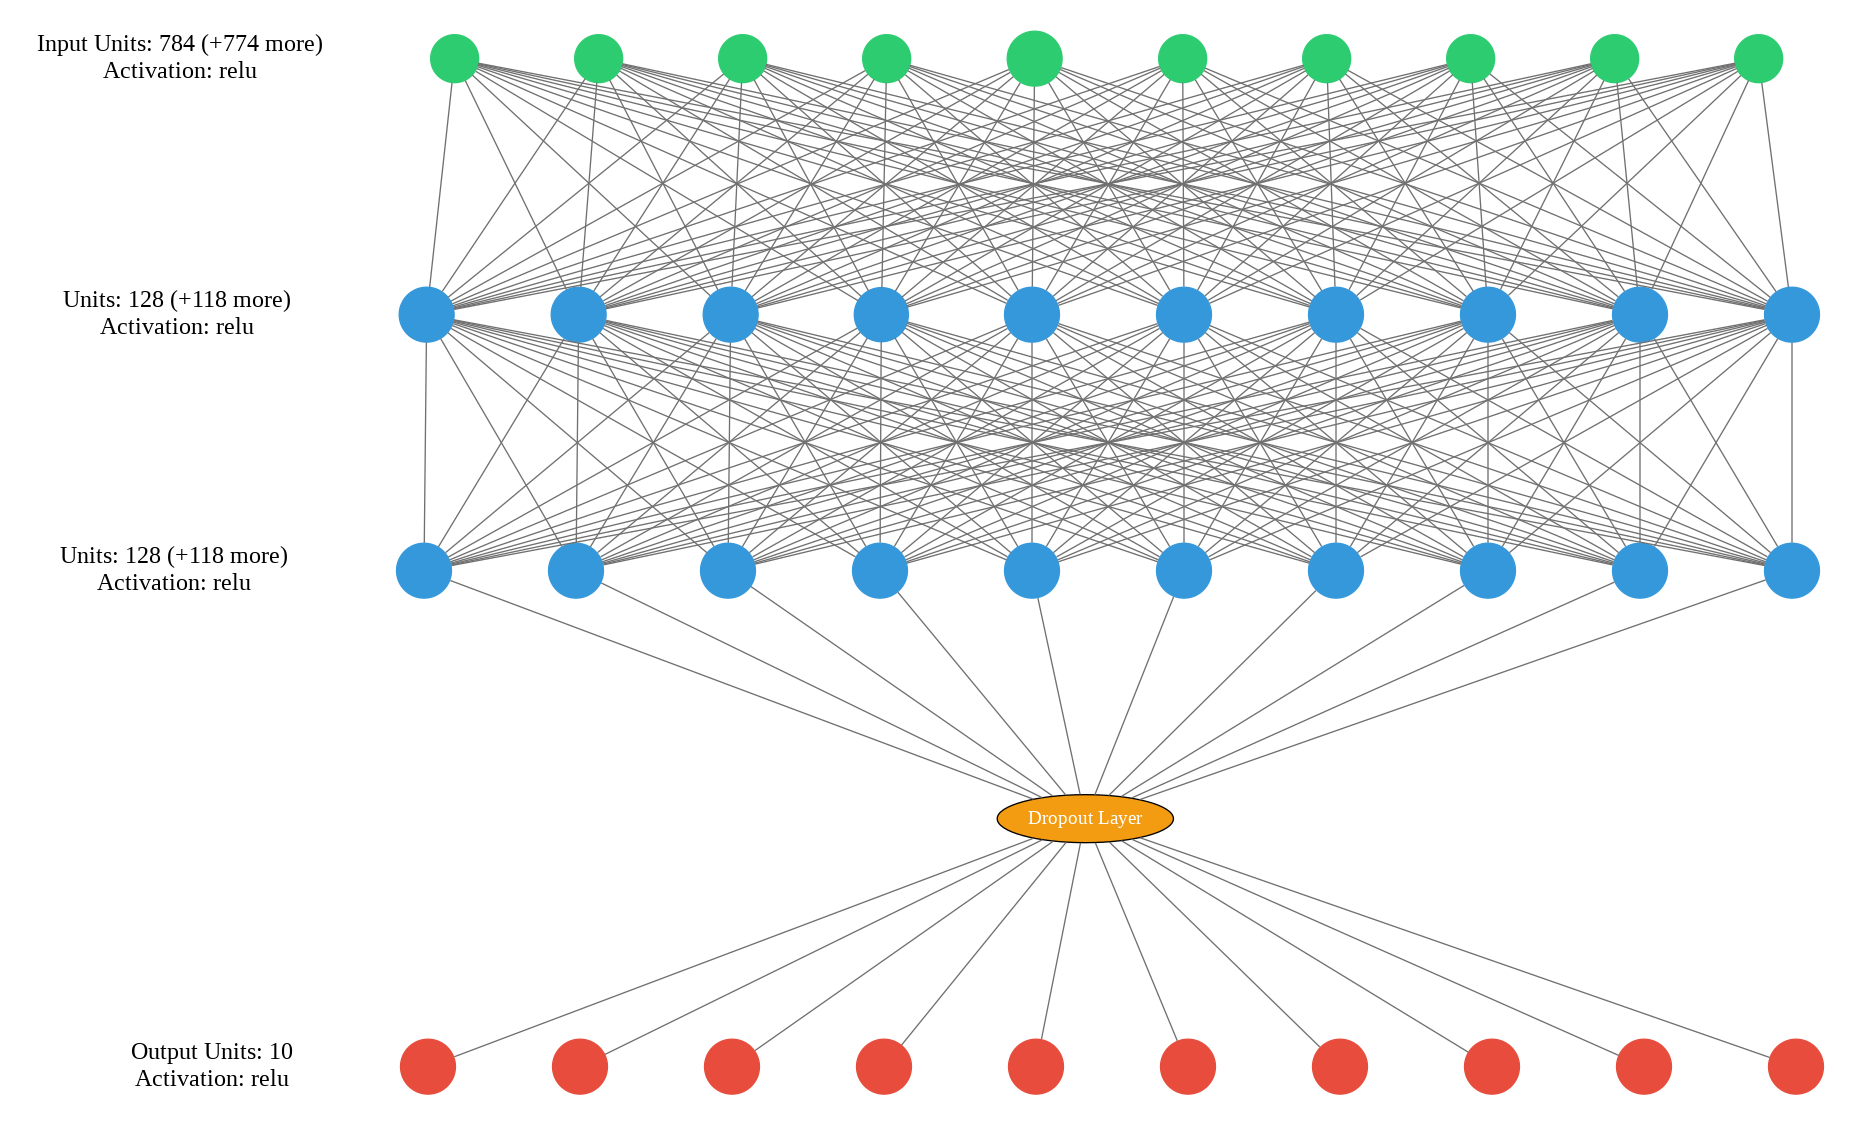

In [ ]:
visualizer(model, format='png', view=True)
Image(filename = "/content/graph.png", width = 1400, height = 900)

#Entrenando el modelo

Aca la primera línea define el tamaño de nuesto lote, que es el número de ejemplos (imagenes) de entrenamiento que se usarán antes de actualizar los pesos del modelo. La segunda línea define el número de epochs, que es el número de veces que el algoritmo de entrenamiento verá todos los ejemplos de entrenamiento. La tercera línea es el comando de Keras para entrenar el modelo. x_train es la matriz de datos de entrenamiento, y_train es el vector de etiquetas de entrenamiento, batch_size es el tamaño del lote, epochs indica la cantidad de pasadas que nuestro algoritmo ha completado durante ese entrenamiento.y validation_split es el porcentaje de ejemplos de entrenamiento que se reservarán para la validación.
Con esto vamos a poder calcular la cantidad de loss y la de accuracy. El primero es una métrica que indica qué tan bien el modelo está aprendiendo los datos de entrenamiento. Mientras que el segundo es una métrica que indica qué tan bien el modelo está generando predicciones en relación con los datos de entrenamiento.

In [ ]:
batch_size = 512
epochs=10
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
94/94 [==============================] - 4s 34ms/step - loss: 0.6507 - accuracy: 0.8124 - val_loss: 0.2570 - val_accuracy: 0.9257
Epoch 2/10
94/94 [==============================] - 1s 15ms/step - loss: 0.2486 - accuracy: 0.9284 - val_loss: 0.1807 - val_accuracy: 0.9468
Epoch 3/10
94/94 [==============================] - 1s 14ms/step - loss: 0.1790 - accuracy: 0.9491 - val_loss: 0.1465 - val_accuracy: 0.9557
Epoch 4/10
94/94 [==============================] - 1s 15ms/step - loss: 0.1418 - accuracy: 0.9577 - val_loss: 0.1264 - val_accuracy: 0.9618
Epoch 5/10
94/94 [==============================] - 1s 13ms/step - loss: 0.1197 - accuracy: 0.9643 - val_loss: 0.1126 - val_accuracy: 0.9664
Epoch 6/10
94/94 [==============================] - 1s 14ms/step - loss: 0.1024 - accuracy: 0.9703 - val_loss: 0.1035 - val_accuracy: 0.9682
Epoch 7/10
94/94 [==============================] - 1s 14ms/step - loss: 0.0853 - accuracy: 0.9746 - val_loss: 0.0965 - val_accuracy: 0.9707
Epoch 8/10
94

En pocas palabras, esto esta solo para visualizar, en un principio calculamos la pérdida y la precisión del modelo en los conjuntos de datos de prueba. Despues, imprimimos un gráfico de la precisión y la pérdida del modelo durante el entrenamiento.

313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9764
Test Loss: 0.07573657482862473, Test Accuracy: 0.9764000177383423
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


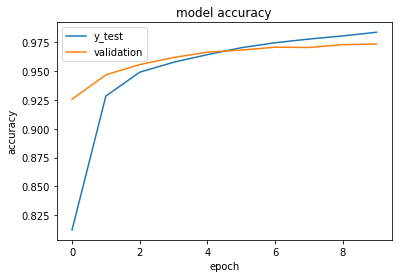

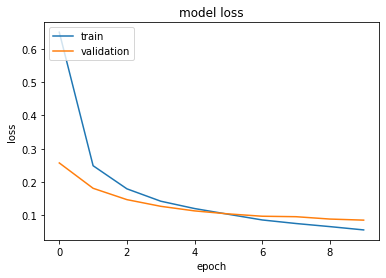

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
print(history.history.keys())

#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['y_test', 'validation'], loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Evaluar

En esta parte, estamos prediciendo la clase de cada ejemplo en el conjunto de datos de prueba. Por un lado, y_pred contiene las probabilidades de pertenencia a cada clase para cada ejemplo en el conjunto de datos de prueba. Por otro lado, y_pred_classes contiene la clase predicha para cada ejemplo en el conjunto de datos de prueba.

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.0296691e-06 1.1521315e-06 8.7644614e-05 ... 9.9967664e-01
  1.6623477e-06 4.3160353e-06]
 [5.4040580e-08 6.3783220e-05 9.9992126e-01 ... 1.2326246e-08
  5.2611626e-06 1.9285877e-10]
 [1.4365862e-05 9.9860078e-01 2.3710669e-04 ... 4.1119984e-04
  3.3233463e-04 1.4725499e-05]
 ...
 [5.6354421e-10 1.3306496e-07 1.0496851e-09 ... 2.0118436e-07
  1.4999532e-06 1.1053725e-05]
 [4.7011444e-08 2.8852567e-09 1.0180555e-09 ... 8.6343963e-09
  3.3522338e-05 7.7940232e-10]
 [1.4908198e-07 4.3341117e-10 5.8568492e-08 ... 1.5961397e-11
  5.4074998e-09 1.9909924e-10]]
[7 2 1 ... 4 5 6]


Para finalizar, para mostrar el resultado que obtuvimos, generamos un índice aleatorio, luego seleccionamos una muestra de datos de x_test utilizando ese índice y finalmente generamos una clase de muestra predicha utilizando el índice. (Despues le agregamos un bucle for para mostrar 3 ejemplos).

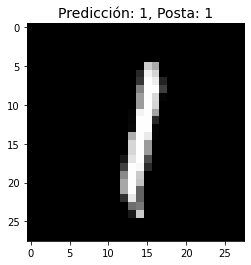

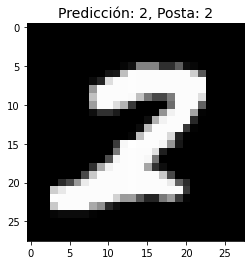

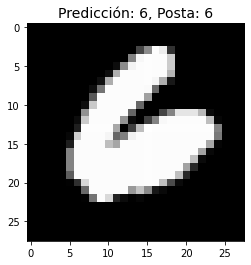

In [17]:
for i in range(3):
 random_idx = np.random.choice(len(x_test))
 x_sample = x_test[random_idx]
 y_true = np.argmax(y_test, axis=1)
 y_sample_true = y_true[random_idx]
 y_sample_pred_class = y_pred_classes[random_idx]

 plt.title("Predicción: {}, Posta: {}".format(y_sample_pred_class, y_sample_true), fontsize=14)
 plt.imshow(x_sample.reshape(28, 28), cmap='gray')
 plt.show()